تمرین ۱:

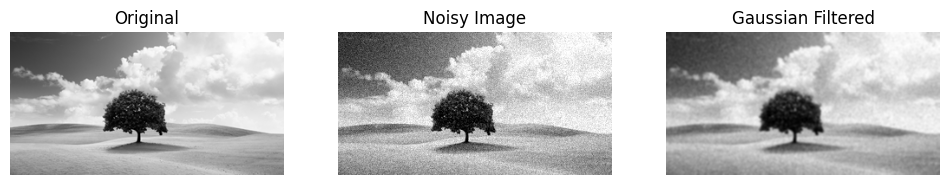

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/single tree.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noise = np.random.normal(0, 15, img_gray.shape)
noisy_img = img_gray.astype(np.float32) + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

filtered_img = cv2.GaussianBlur(noisy_img, (5, 5), 0)

residual = noisy_img.astype(np.float32) - filtered_img.astype(np.float32)
mean_residual_noise = np.mean(np.abs(residual))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gaussian Filtered")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()

تمرین ۲:

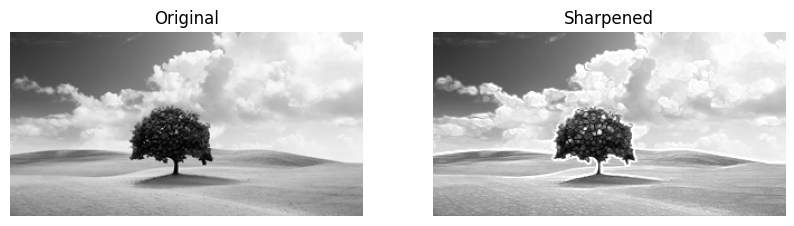

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/single tree.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

gradient_norm = cv2.normalize(
    gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX
).astype(np.uint8)

sharpened = cv2.add(img_gray, gradient_norm)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sharpened")
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.show()

تمرین ۳:

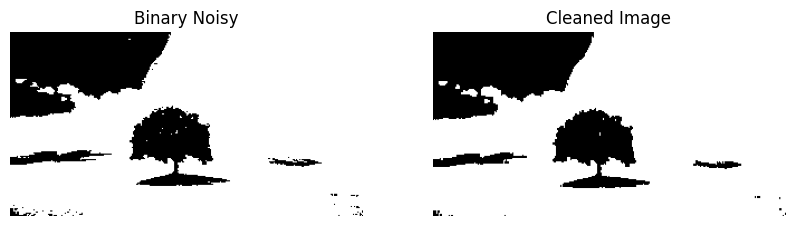

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/single tree.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, (3, 3))
cleaned = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, (3, 3))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Binary Noisy")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cleaned Image")
plt.imshow(cleaned, cmap='gray')
plt.axis('off')

plt.show()